In [1]:
from plotting.style_setup import setup_plot_style
from metrics_extractor import MetricsExtractor, PrometheusSource, metrics_io
from datetime import datetime, timedelta, timezone
from plotting.plot_templates import *
setup_plot_style()

# Available Metrics

In [2]:
type_exp = "vanilla"

selected_metrics = [
    "mc_players_online_local{world='world'}", #0
    "mc_tps", #1
    "quantile(0.5, mc_tps)", #2
    "quantile(0.95, mc_tps)", #3
    "sum(mc_players_online_local{world='world'})", #4
    "count(count by(server_name) (mc_tps))", #5
    "mc_mspt_seconds_10_mean", #6
    "rate(container_network_receive_bytes_total{pod=~'multipaper-master-.*'}[1m])", #7
    "rate(container_network_transmit_bytes_total{pod=~'multipaper-master-.*'}[1m])", #8
    "rate(container_network_receive_bytes_total{pod=~'multipaper-server-.*'}[1m])", #9
    "rate(container_network_transmit_bytes_total{pod=~'multipaper-server-.*'}[1m])", #10
    "container_memory_usage_bytes{container='multipaper-master-velocity'}", #11
    "container_memory_usage_bytes{container='multipaper-server'}", #12
    "rate(container_cpu_usage_seconds_total{container='multipaper-master-velocity'}[1m])", #13
    "rate(container_cpu_usage_seconds_total{container='multipaper-server'}[1m])", #14
    "sum by(owner) (mc_chunk_ownership)", #15
    "minecraft_world_loaded_chunks{world='world'}", #16
    "mc_player_location", #17
    "sum by(chunk_owner) (mc_player_location)", #18
    "server_latency", #19
    "avg(server_latency)", #20
    "max(server_latency)", #21
    "min(server_latency)", #22 
    "quantile(0.5, server_latency)", #23
    "quantile(0.99, server_latency)", #24
    "avg(mc_tps)", #25
    "avg(mc_mspt_seconds_10_mean)", #26
    "quantile(0.95, mc_mspt_seconds_10_mean)", #27
    "quantile(0.5, mc_mspt_seconds_10_mean)", #28
    "max(mc_tps)", #29
    "min(mc_tps)", #30
    "min(mc_mspt_seconds_10_mean)", #31
    "max(mc_mspt_seconds_10_mean)", #32
    # "sum(mc_tps)", #33
    # "quantile(0.99, mc_tps)", #34
    # "minecraft_tick_duration_seconds_bucket", #35
    # "sum(rate(minecraft_tick_duration_seconds_bucket[2s])) by(le)", #36
    # "mc_chunk_ownership", #37
]

### Change Time Zone (to UTC + 02:00)

Only if needed

In [3]:
def change_timezone(input_time):
    """
    Change the timezone of the timestamp from UTC to UTC +020:00 (Europe/Berlin).
    """
    utc = timezone.utc
    utc_plus_2 = timezone(timedelta(hours=2))

    from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)
    to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)

    from_time_local = from_time.astimezone(utc_plus_2)
    to_time_local = to_time.astimezone(utc_plus_2)

    return from_time_local, to_time_local

# Extract Metrics

In [4]:
experiment = "8s_multibot_interval"

input_time = {"from":"2025-06-24 10:33:10","to":"2025-06-24 10:43:40"}

# Uncomment the following lines to use the original time parsing UTC +00
# from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S")
# to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S")

# Use the change_timezone function to convert the time to UTC +02:00
from_time, to_time = change_timezone(input_time)

# UNCOMMENT THE FOLLOWING LINES TO EXTRACT METRICS FROM PROMETHEUS
# prometheus = PrometheusSource(url="http://localhost:62267/")
# extractor = MetricsExtractor()

# metrics_io.save_metrics(selected_metrics, from_time, to_time, prometheus, extractor, experiment, type_exp)

# Plots

## 2 Servers

### Idle + Interval

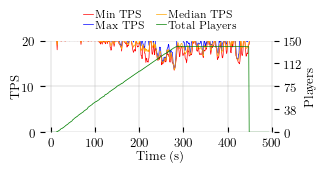

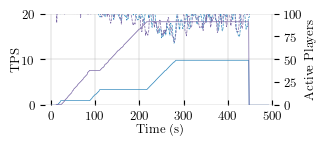

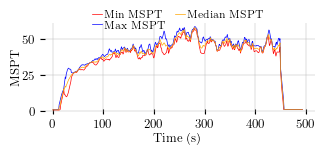

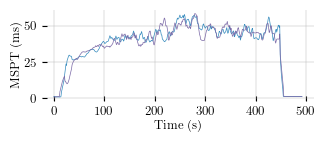

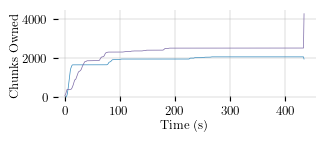

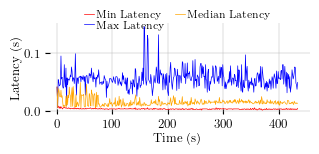

In [5]:
experiment = "2s_idle_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

### Idle + Batch

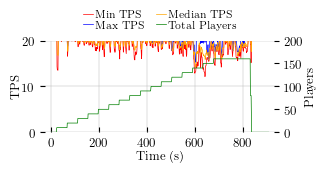

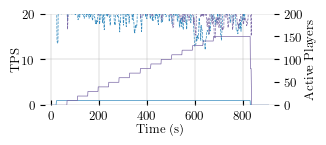

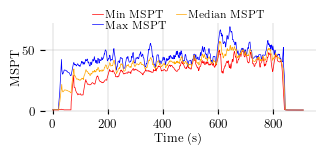

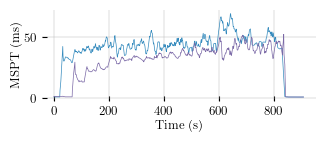

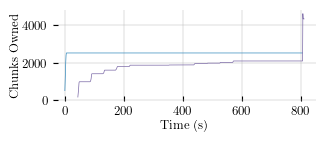

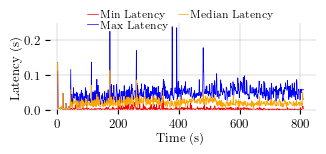

In [6]:
experiment = "2s_idle_batch"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# 8 Servers Interval

## Idle

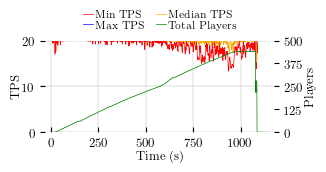

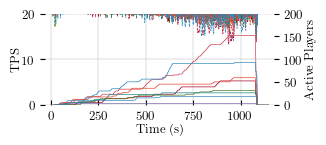

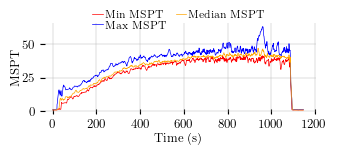

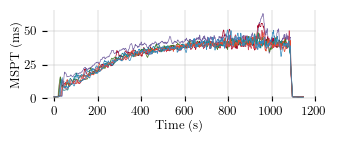

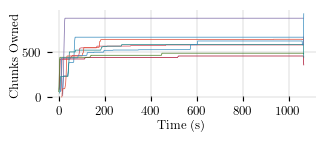

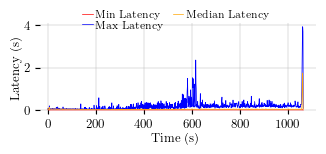

In [7]:
experiment = "8s_idle_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk

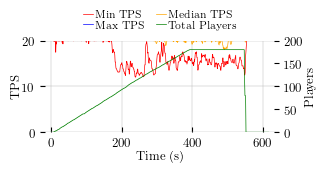

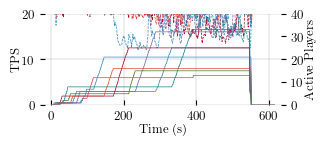

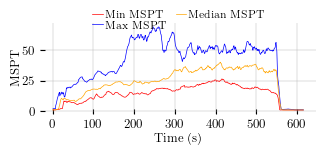

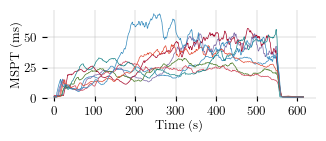

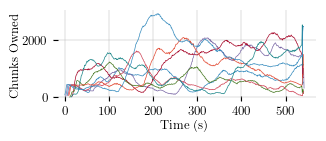

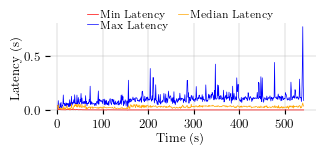

In [8]:
experiment = "8s_walk_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Miner

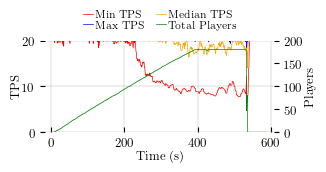

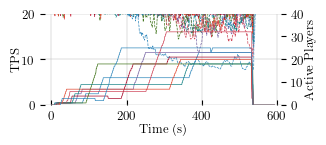

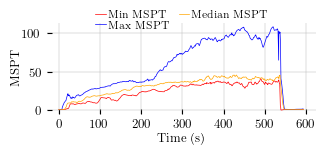

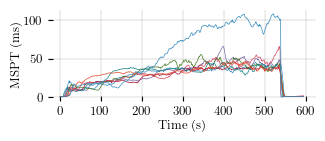

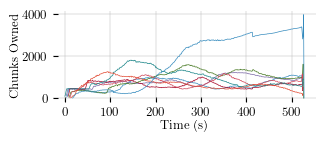

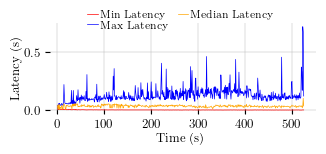

In [9]:
experiment = "8s_miner_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## PVP

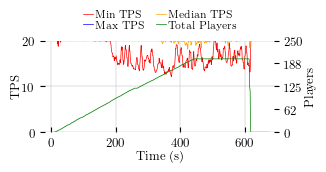

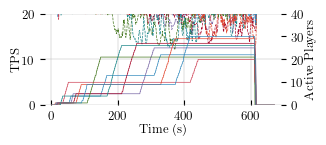

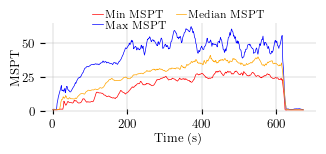

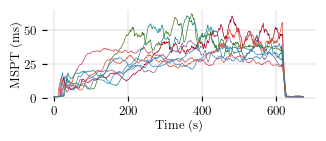

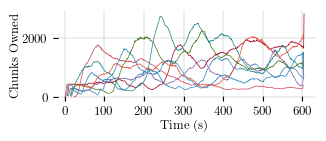

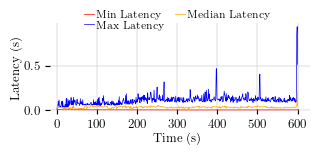

In [10]:
experiment = "8s_pvp_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk (SpawnRadius = 100)

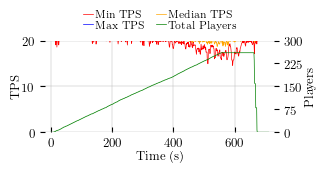

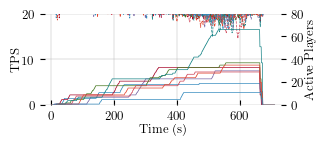

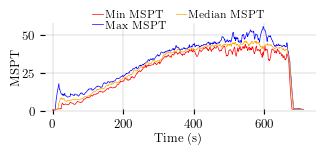

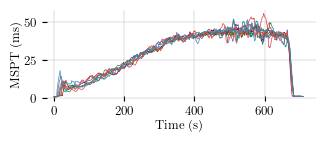

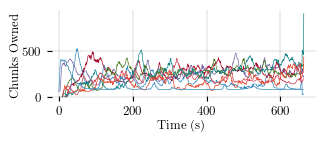

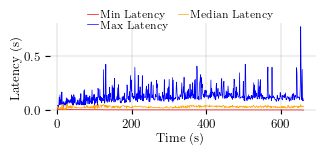

In [11]:
experiment = "spawn_100_8s_walk_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## PVP (SpawnRadius = 100)

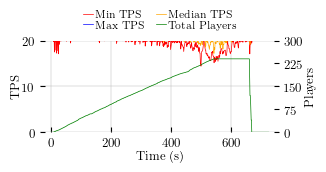

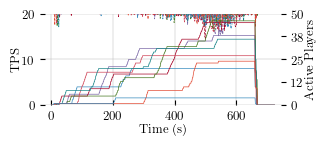

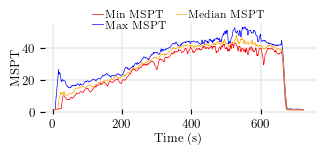

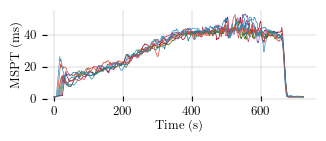

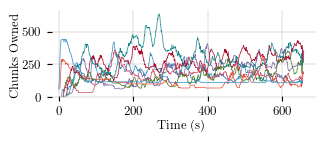

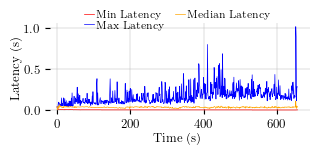

In [12]:
experiment = "spawn_100_8s_pvp_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

### Attack Cooldown 2s

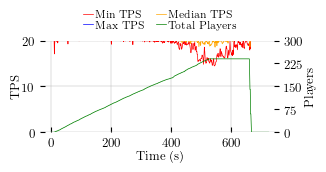

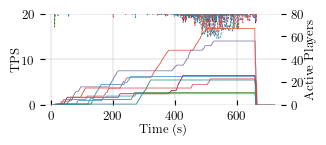

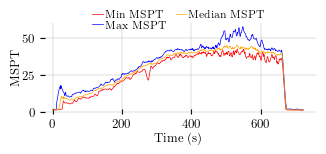

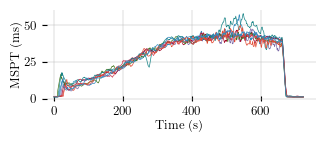

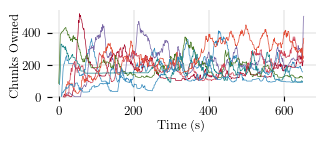

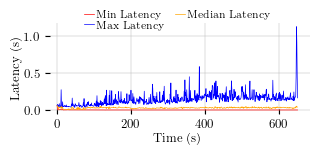

In [13]:
experiment = "spawn_100_8s_pvp_interval_cooldown_2s"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Multi-Bot (walk + miner + pvp)

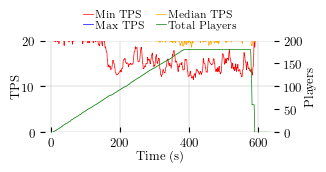

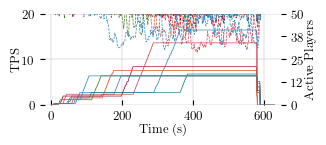

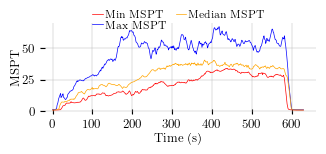

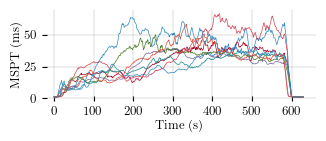

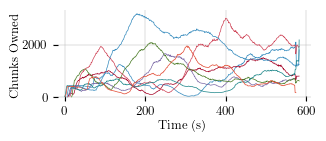

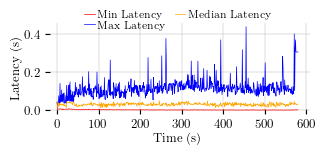

In [14]:
experiment = "8s_multibot_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# 8 Servers Batch

## Idle

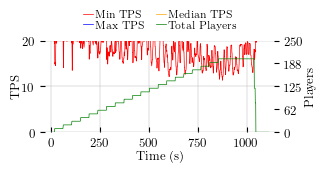

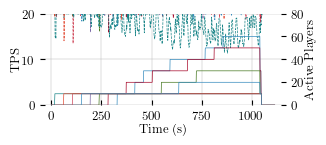

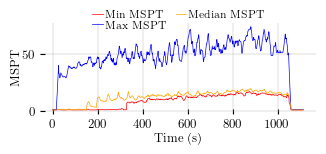

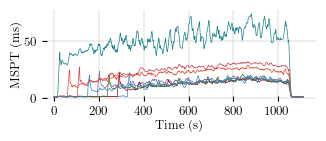

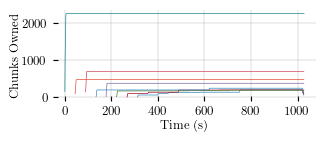

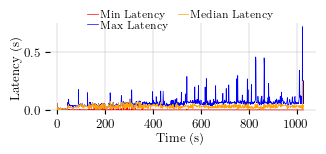

In [15]:
experiment = "8s_idle_batch"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk

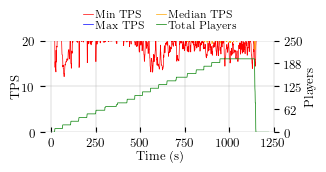

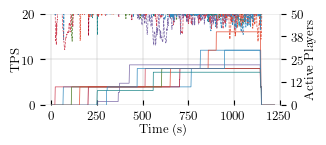

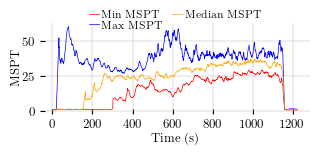

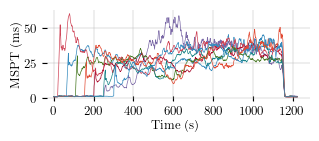

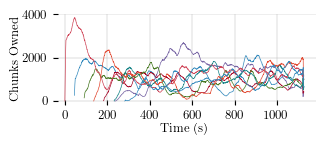

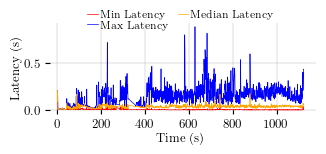

In [16]:
experiment = "8s_walk_batch"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Miner

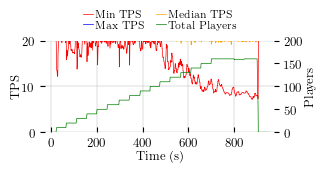

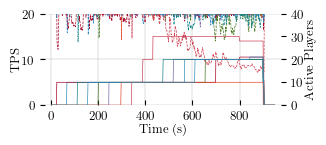

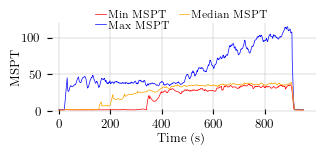

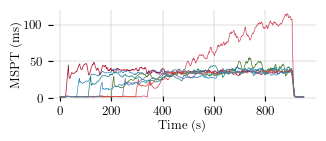

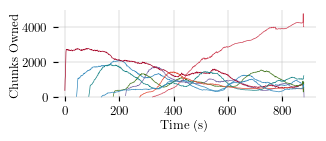

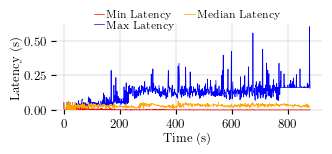

In [17]:
experiment = "8s_miner_batch"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## PVP

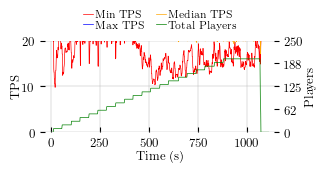

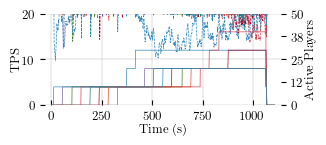

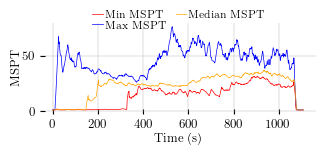

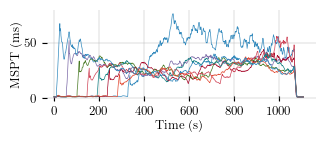

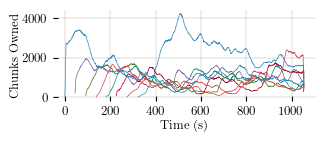

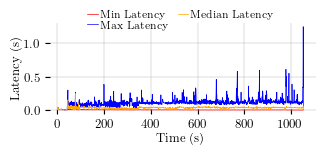

In [18]:
experiment = "8s_pvp_batch"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# 32 Servers Walk Interval

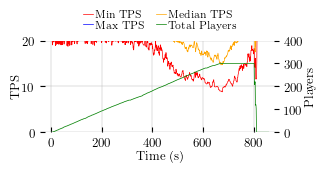

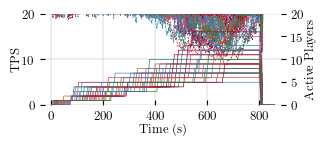

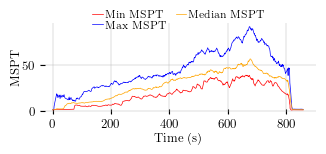

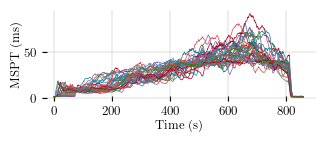

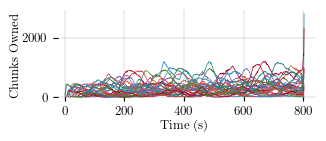

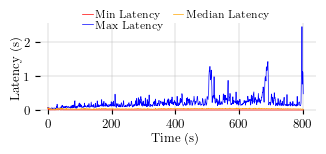

In [19]:
experiment = "32s_walk_interval"
# tps_players_plot(experiment, selected_metrics, type_exp)
tps_players_stats_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
latency_plot(experiment, selected_metrics, type_exp)
# tps_servers_plot(experiment, selected_metrics, type_exp)
# players_servers_plot(experiment, selected_metrics, type_exp)
# players_chunks_owner_plot(experiment, selected_metrics, type_exp)